In [1]:
import pandas as pd
import numpy as np 

In [2]:
aapl = pd.read_csv('aapl.us.txt', index_col='Date')
mask = (aapl.index > '2007-11-10') & (aapl.index <= '2017-11-10')
aapl = aapl.loc[mask]

amzn = pd.read_csv('amzn.us.txt', index_col='Date')
mask = (amzn.index > '2007-11-10') & (amzn.index <= '2017-11-10')
amzn = amzn.loc[mask]

csco = pd.read_csv('csco.us.txt', index_col='Date')
mask = (csco.index > '2007-11-10') & (csco.index <= '2017-11-10')
csco = csco.loc[mask]

ibm = pd.read_csv('ibm.us.txt', index_col='Date')
mask = (ibm.index > '2007-11-10') & (ibm.index <= '2017-11-10')
ibm = ibm.loc[mask]

In [3]:
aapl.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2007-11-12,21.130,21.479,19.291,19.691,492362604,0
2007-11-13,20.615,21.897,19.691,21.765,484373501,0
2007-11-14,22.733,22.739,20.970,21.274,403585172,0
2007-11-15,21.280,21.717,20.528,21.040,414487458,0
2007-11-16,21.193,21.388,20.405,21.309,385660112,0


# Cumulative daily return

In [4]:
for stock_data in (aapl, amzn, csco, ibm):
    stock_data['Normed Return'] = stock_data['Close']/stock_data.iloc[0]['Close']

In [5]:
aapl.tail()

,Open,High,Low,Close,Volume,OpenInt,Normed Return
Date,,,,,,,
2017-11-06,171.75,174.36,171.10,173.63,34901241,0,8.817734
2017-11-07,173.29,174.51,173.29,174.18,24424877,0,8.845666
2017-11-08,174.03,175.61,173.71,175.61,24451166,0,8.918288
2017-11-09,174.48,175.46,172.52,175.25,29533086,0,8.900005
2017-11-10,175.11,175.38,174.27,174.67,25130494,0,8.870550


In [6]:
# Allocations
# 30% apple
# 20% cisco
# 40% amazon
# 10% ibm

In [7]:
for stock_data, allo in zip((aapl, amzn, csco, ibm),[.3,.2,.4,.1]):
    stock_data['Stock Allocation'] = stock_data['Normed Return']*allo

In [8]:
aapl.head()

,Open,High,Low,Close,Volume,OpenInt,Normed Return,Stock Allocation
Date,,,,,,,,
2007-11-12,21.130,21.479,19.291,19.691,492362604,0,1.000000,0.300000
2007-11-13,20.615,21.897,19.691,21.765,484373501,0,1.105327,0.331598
2007-11-14,22.733,22.739,20.970,21.274,403585172,0,1.080392,0.324118
2007-11-15,21.280,21.717,20.528,21.040,414487458,0,1.068508,0.320553
2007-11-16,21.193,21.388,20.405,21.309,385660112,0,1.082170,0.324651


In [9]:
for stock_data in (aapl, amzn, csco, ibm):
    stock_data['Position Values'] = stock_data['Stock Allocation'] * 1000000 # number can be different, depending on the money invested

In [10]:
amzn.head()

,Open,High,Low,Close,Volume,OpenInt,Normed Return,Stock Allocation,Position Values
Date,,,,,,,,,
2007-11-12,78.25,80.09,76.50,77.00,9396839,0,1.000000,0.200000,200000.000000
2007-11-13,77.83,80.05,77.80,79.86,9495265,0,1.037143,0.207429,207428.571429
2007-11-14,80.40,81.15,78.15,78.51,8426095,0,1.019610,0.203922,203922.077922
2007-11-15,79.14,79.73,76.70,77.85,7817223,0,1.011039,0.202208,202207.792208
2007-11-16,77.31,78.99,76.63,78.60,7113910,0,1.020779,0.204156,204155.844156


In [15]:
portfolio_val = pd.concat([aapl['Position Values'], 
                           amzn['Position Values'], 
                           csco['Position Values'], 
                           ibm['Position Values']], axis=1)
portfolio_val.columns = ['AAPL Position', 'AMZN Position', 'CSCO Position', 'IBM Position']
portfolio_val['Totoal Position'] = portfolio_val.sum(axis=1)
portfolio_val.tail()

,AAPL Position,AMZN Position,CSCO Position,IBM Position,Totoal Position
Date,,,,,
2017-11-06,2.645320e+06,2.910805e+06,572260.103110,176303.239211,6.304689e+06
2017-11-07,2.653700e+06,2.917325e+06,571844.337269,176893.474360,6.319762e+06
2017-11-08,2.675486e+06,2.942545e+06,573756.860136,177153.177826,6.368942e+06
2017-11-09,2.670002e+06,2.932805e+06,566273.075004,177424.685995,6.346504e+06
2017-11-10,2.661165e+06,2.922987e+06,565275.236987,176078.949854,6.325506e+06


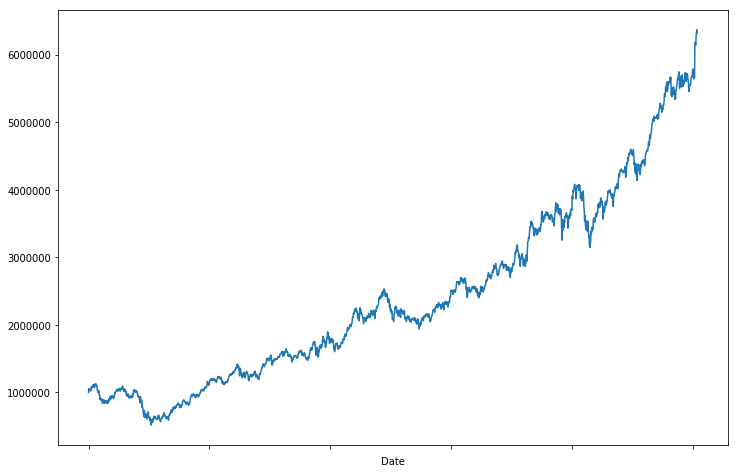

In [17]:
portfolio_val['Totoal Position'].plot(figsize=(12,8));

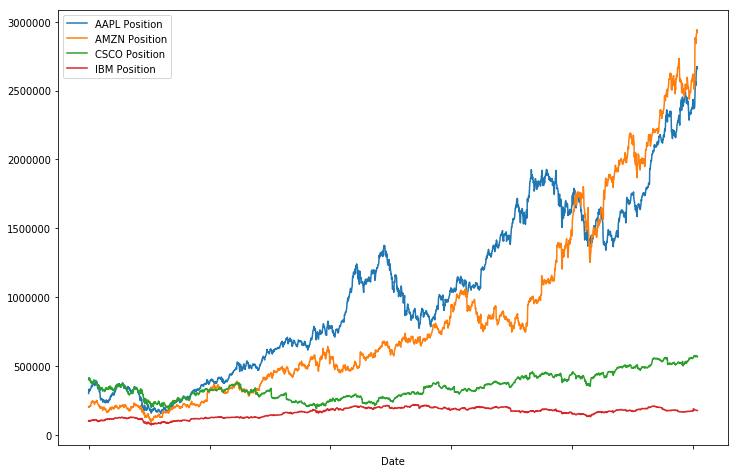

In [18]:
portfolio_val.drop('Totoal Position',axis=1).plot(figsize=(12,8));

# Portfolio Stats

In [24]:
portfolio_val['Daily Return'] = portfolio_val['Totoal Position'].pct_change(1)
portfolio_val.head()

,AAPL Position,AMZN Position,CSCO Position,IBM Position,Totoal Position,Daily Return
Date,,,,,,
2017-11-06,2.645320e+06,2.910805e+06,572260.103110,176303.239211,6.304689e+06,0.007726
2017-11-07,2.653700e+06,2.917325e+06,571844.337269,176893.474360,6.319762e+06,0.002391
2017-11-08,2.675486e+06,2.942545e+06,573756.860136,177153.177826,6.368942e+06,0.007782
2017-11-09,2.670002e+06,2.932805e+06,566273.075004,177424.685995,6.346504e+06,-0.003523
2017-11-10,2.661165e+06,2.922987e+06,565275.236987,176078.949854,6.325506e+06,-0.003309


In [23]:
print('Average Daily return = {}'.format(portfolio_val['Daily Return'].mean()))
print('Std of Daily return = {}'.format(portfolio_val['Daily Return'].std()))
print('Cumulative return = {}%'.format(100*(portfolio_val['Totoal Position'][-1]/portfolio_val['Totoal Position'][0] - 1)))

Average Daily return = 0.0008622835956002455
Std of Daily return = 0.01610186922230285
Cumulative return = 532.5506199065395%


In [29]:
Sharp_ration = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
print('Sharp ratio: {}'.format(Sharp_ration))
Annual_Sharp_ratio = (252**0.5)*Sharp_ration
print('Annual Sharp ratio: {}'.format(Annual_Sharp_ratio))

Sharp ratio: 0.05355176990295563
Annual Sharp ratio: 0.8501079925834449
